# COGS 108 - Analysis of the U.S. Automotive Market and Its Employment Status

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private


Video presentataion: https://youtu.be/zp6WABF6B4I

# Overview

In this project, we attempted to determine if there is any relationship between the rising automobile market and the employment status of automobile manufacturing and retail industries. After cleaning the dataset, we utilized the data visualization and concluded that the increasing automotive sales market boosts U.S. automotive manufacturing and retail trade employment.

# Names

- Weijie Huang
- Jianzhang Chen
- Audrey Yeh
- Liu He

<a id='research_question'></a>
# Research Question

Has the automotive market boosted the U.S. automotive manufacturing and retail trade employment since 1990?

<a id='background'></a>

## Background & Prior Work

As we know, the automobile industry in the United States has a long and brilliant history. Cars are not only an inseparable tool for us but also an essential part of the American economy. However, the sudden arrival of covid-19 in 2020 has hit the auto industry deeply. Now, In the post-pandemic era, the auto industry has begun to recover, and auto sales increased suddenly. However, according to BLS statistics, auto-related employment did not grow as explosively as auto sales. Is this due to covid-19? Or is auto sales have no apparent relationship to automobile Industry employment? To figure out our answer, we will retrieve employment data related to the auto industry and auto sales data since the 1990s and analyze whether the growth and decline of each data are associated with each other.

References:
1) https://www.bls.gov/iag/tgs/iagauto.htm

2) https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/how-the-automotive-industry-is-accelerating-out-of-the-turn

# Hypothesis


We believe that the rising of the auto market boosted the labor market. Hence, we hypothesize that employment related to automobile manufacturing and retail has risen as the increment in vehicle sales from 1990 to 2022.

# Dataset(s)

- Dataset Name: All employees, thousands, motor vehicles and parts manufacturing, seasonally adjusted
- File Name: "motor vehicle and parts dealers.csv"
- Link to the dataset: https://beta.bls.gov/dataViewer/view/timeseries/CES3133600101
- Number of observations: 388
- Description: This data set contains the number of employees who work with the manufacturing of motor vehicles and parts from 1900 to March 2022.

- Dataset Name: All employees, thousands, motor vehicle and parts dealers, seasonally adjusted
- File name: "motor vehicle and parts dealers.csv"
- Link to the dataset: https://beta.bls.gov/dataViewer/view/timeseries/CES4244100001
- Number of observations: 387
- Description: This data set contains the number of employees who work in the retail trade of motor vehicles and parts from 1900 to March 2022.

- Dataset Name: All employees, thousands, automobile dealers, seasonally adjusted
- Link to the dataset: https://beta.bls.gov/dataViewer/view/timeseries/CES4244110001
- Number of observations: 387
- Description: This data set contains the number of employees who work in the retail trade of automobile from 1900 to March 2022.

- Dataset Name: Total Vehicle Sales of the United States
- Link to the dataset: https://fred.stlouisfed.org/series/TOTALSA
- Number of observations: 556
- Description: This data set contains the history number of vehicle sales from 1976 to March 2022.

The datasets above are collected by the U.S. Bureau of Labor Statistics and Bureau of Economic Analysis, so they are accurate and their reliability should be high. However, since the automotive industry has been changing, especially in the last few decades, this means the employment situation has changed as well (i.e., more positions are provided due to the invention of new automotive technology, such as alternative fuel vehicles); we decided to limit the range of the data period and only collect data from 1990 to 2022.

We will compare each of the employment statistics to the vehicle sales history to see if the increase/decrease in employment has any relationship with the boomed/downturn auto market.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

# A self-define dir to help convert month name to number
month_dir = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

# Data Cleaning

## 1. Cleaning the "Automobile dealers.csv"

First, we want to drop the first column, 'Series', which is the series number generated by BLS for arranging purposes, and it is useless for our research. Then we want to obtain only the data since 1990.

In [2]:
auto_dealer = pd.read_csv("Automobile dealers.csv")
auto_dealer = auto_dealer.drop(auto_dealer.columns[0],axis = 1) # drop the first column (Series ID)
auto_dealer = auto_dealer[auto_dealer.Year >= 1990] # drop all rows that the year is before 1990

We observed that the column 'Label' is formatted as the year with the month name, which is not ideal for us to sort the data. Hence, we want to convert the date format to this format 'yyyy-mm-dd', which is more acceptable to our interpreter to handle data.

Then, we split the Year and Month from 'Label', and drop the column 'period' and 'Label' since we don't need them anymore:

In [3]:
auto_dealer[['Year', 'Month']] = auto_dealer['Label'].str.split(' ', expand=True) # Split Year and Month from 'Label'
auto_dealer.drop(columns=['Period', 'Label']) # drop the column 'Period' and 'Label'

,Year,Value,Month
216,1990,994.8,Jan
217,1990,995.6,Feb
218,1990,994.1,Mar
219,1990,991.8,Apr
220,1990,988.9,May
...,...,...,...
598,2021,1225.9,Nov
599,2021,1226.4,Dec
600,2022,1228.4,Jan
601,2022,1231.8,Feb


Now we have two columns, 'Year' and 'Label'. We want to merge them to the new column 'Time' with the format 'yyyy-mm-dd':

In [4]:
auto_dealer = auto_dealer.replace({"Month":month_dir}) # convert the month name to number
auto_dealer['Time'] = pd.to_datetime(auto_dealer[['Year', 'Month']].assign(DAY=1)) # merge year and month to date

Finally, we re-arrange the columns as: Time, Value. Now the data cleaning for "Automobile dealers.csv" is finished.

In [5]:
auto_dealer = auto_dealer.reindex(columns=['Time', 'Value'])
auto_dealer

,Time,Value
216,1990-01-01,994.8
217,1990-02-01,995.6
218,1990-03-01,994.1
219,1990-04-01,991.8
220,1990-05-01,988.9
...,...,...
598,2021-11-01,1225.9
599,2021-12-01,1226.4
600,2022-01-01,1228.4
601,2022-02-01,1231.8


## 2. Cleaning the "motor vehicle and parts dealers.csv"

Since this dataset has the same format as "Automobile dealers.csv", our cleaning method for it will be very similar to above.

Drop the first column and get the data from 1990 to 2022:

In [6]:
motor_parts = pd.read_csv("motor vehicle and parts dealers.csv")
motor_parts = motor_parts.drop(motor_parts.columns[0],axis = 1) # drop the first column (Series ID)
motor_parts = motor_parts[motor_parts.Year >= 1990] # drop all rows that the year is before 1990

Split the Year and Month from 'Label', and drop the column 'period' and 'Label':

In [7]:
motor_parts[['Year', 'Month']] = motor_parts['Label'].str.split(' ', expand=True) # Split Year and Month from 'Label'
motor_parts.drop(columns=['Period', 'Label']) # drop the column 'Period' and 'Label'

,Year,Value,Month
0,1990,1509.2,Jan
1,1990,1510.9,Feb
2,1990,1508.3,Mar
3,1990,1505.7,Apr
4,1990,1502.8,May
...,...,...,...
382,2021,1949.2,Nov
383,2021,1950.9,Dec
384,2022,1954.5,Jan
385,2022,1959.8,Feb


Merge the column 'Year' and 'Month' to a new column 'Time':

In [8]:
motor_parts = motor_parts.replace({"Month":month_dir}) # convert the month name to number
motor_parts['Time'] = pd.to_datetime(motor_parts[['Year', 'Month']].assign(DAY=1)) # merge year and month to date

Re-arrange the columns as: Time, Value. The data cleaning for "motor vehicle and parts dealers.csv" is finished.

In [9]:
motor_parts = motor_parts.reindex(columns=['Time', 'Value'])
motor_parts

,Time,Value
0,1990-01-01,1509.2
1,1990-02-01,1510.9
2,1990-03-01,1508.3
3,1990-04-01,1505.7
4,1990-05-01,1502.8
...,...,...
382,2021-11-01,1949.2
383,2021-12-01,1950.9
384,2022-01-01,1954.5
385,2022-02-01,1959.8


## 3. Cleaning the "Motor vehicles and parts manufacturing.csv"

Since this dataset has the same format as "Automobile dealers.csv", our cleaning method for it will be very similar to above.

Drop the first column and get the data from 1990 to 2022:

In [10]:
motor_part_Man = pd.read_csv("Motor vehicles and parts manufacturing.csv")
motor_part_Man = motor_part_Man.drop(motor_part_Man.columns[0],axis = 1) # drop the first column (Series ID)
motor_part_Man = motor_part_Man[motor_part_Man.Year >= 1990] # drop all rows that the year is before 1990

Split the Year and Month from 'Label', and drop the column 'period' and 'Label':

In [11]:
motor_part_Man[['Year', 'Month']] = motor_part_Man['Label'].str.split(' ', expand=True) # Split Year and Month from 'Label'
motor_part_Man.drop(columns=['Period', 'Label']) # drop the column 'Period' and 'Label'

,Year,Value,Month
0,1990,975.5,Jan
1,1990,1090.8,Feb
2,1990,1087.6,Mar
3,1990,1085.3,Apr
4,1990,1078.9,May
...,...,...,...
382,2021,983.4,Nov
383,2021,984.6,Dec
384,2022,984.9,Jan
385,2022,968.9,Feb


Merge the column 'Year' and 'Month' to a new column 'Time':

In [12]:
motor_part_Man = motor_part_Man.replace({"Month":month_dir}) # convert the month name to number
motor_part_Man['Time'] = pd.to_datetime(motor_part_Man[['Year', 'Month']].assign(DAY=1)) # merge year and month to date

Re-arrange the columns as: Time, Value. The data cleaning for "motor vehicle and parts dealers.csv" is finished.

In [13]:
motor_part_Man = motor_part_Man.reindex(columns=['Time', 'Value'])
motor_part_Man

,Time,Value
0,1990-01-01,975.5
1,1990-02-01,1090.8
2,1990-03-01,1087.6
3,1990-04-01,1085.3
4,1990-05-01,1078.9
...,...,...
382,2021-11-01,983.4
383,2021-12-01,984.6
384,2022-01-01,984.9
385,2022-02-01,968.9


## 4. Cleaning the "TOTALSA.csv"

Compared to other datasets, this one is cleaner in some way. What we need to do is to clean the data before 1990. Besides, we also need to convert the type of the column 'DATE' from object to datime64.

In [14]:
totalSA = pd.read_csv("TOTALSA.csv")
# set the range to filter the data
totalSA = totalSA[totalSA['DATE'] >= '1990-01-01']

# convert dytpe from object to datetime
totalSA['DATE'] = pd.to_datetime(totalSA['DATE'])
totalSA['DATE']

168   1990-01-01
169   1990-02-01
170   1990-03-01
171   1990-04-01
172   1990-05-01
         ...    
550   2021-11-01
551   2021-12-01
552   2022-01-01
553   2022-02-01
554   2022-03-01
Name: DATE, Length: 387, dtype: datetime64[ns]

In [15]:
# rename the column to matach the format of other data
totalSA = totalSA.rename(columns = {'DATE':'Time','TOTALSA':'Value'})
totalSA

,Time,Value
168,1990-01-01,16.308
169,1990-02-01,14.363
170,1990-03-01,14.486
171,1990-04-01,14.281
172,1990-05-01,14.022
...,...,...
550,2021-11-01,13.474
551,2021-12-01,13.004
552,2022-01-01,15.491
553,2022-02-01,14.451


# Data Analysis & Results

## Data visualization for Total Vehicle Sales

We first take the attribute of this data set:

In [16]:
totalSA.describe()

,Value
count,387.000000
mean,15.669762
std,2.149906
min,8.961000
25%,14.459000
50%,16.149000
75%,17.307500
max,22.055000


Then we plot the disribution of total vehicle sales:

Text(0.5, 1.0, 'Total vehicle sales, 1990-2022')

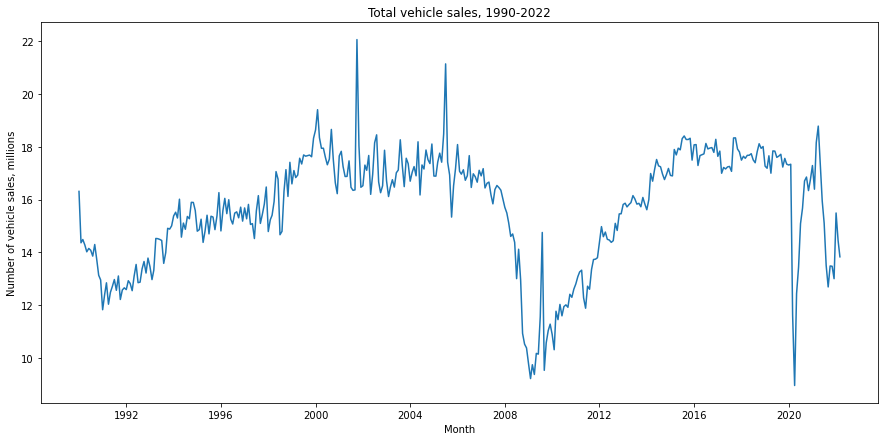

In [17]:
# adjust figure size
plt.figure(figsize = (15,7))

# plot the distribution of the dataset
fig4 = sns.lineplot(data=totalSA, x='Time', y='Value')
fig4.set_xlabel('Month')
fig4.set_ylabel('Number of vehicle sales, millions')
fig4.set_title('Total vehicle sales, 1990-2022')

From this graph, we can see that the number of vehicle sales has an overall increasing trend in the following ranges:
(1991-01-01, 2001-10-01), (2009-09-01, 2017-09-01), and (2020-04-01, 2021-04-01)

## Data visualization for employee of automobile dealers

In [18]:
auto_dealer.describe()

,Value
count,387.000000
mean,1156.092506
std,112.482905
min,927.600000
25%,1065.100000
50%,1190.900000
75%,1250.400000
max,1313.700000


Plotting the distribution of employees of automobile dealers:

Text(0.5, 1.0, 'Automobile dealers employees, 1990-2022')

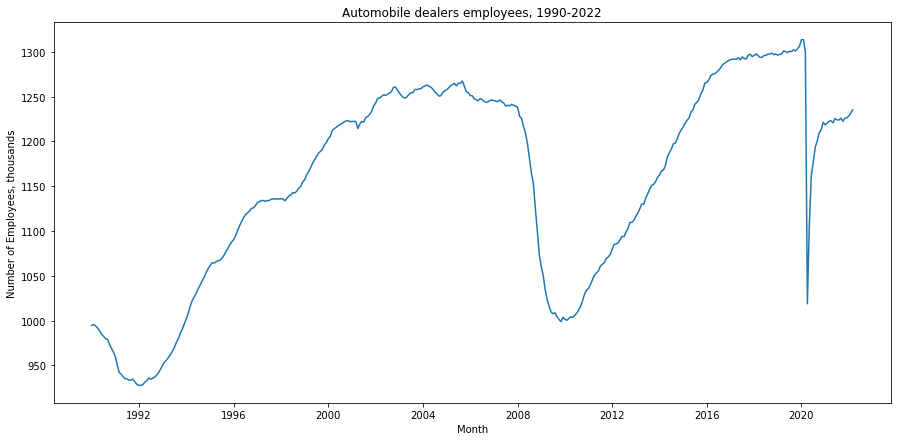

In [19]:
# adjust figure size
plt.figure(figsize = (15,7))

# plot the distribution
fig1 = sns.lineplot(data=auto_dealer, x='Time', y='Value')
fig1.set_xlabel('Month')
fig1.set_ylabel('Number of Employees, thousands')
fig1.set_title('Automobile dealers employees, 1990-2022')

Plotting the disribution of employee of motor vehicles and parts dealers

In [20]:
motor_parts.describe()
motor_parts.head()

,Time,Value
0,1990-01-01,1509.2
1,1990-02-01,1510.9
2,1990-03-01,1508.3
3,1990-04-01,1505.7
4,1990-05-01,1502.8


Plotting the distribution of employee of motor vehicles and parts dealers

Text(0.5, 1.0, 'Motor vehicle and parts dealers employees, 1990-2022')

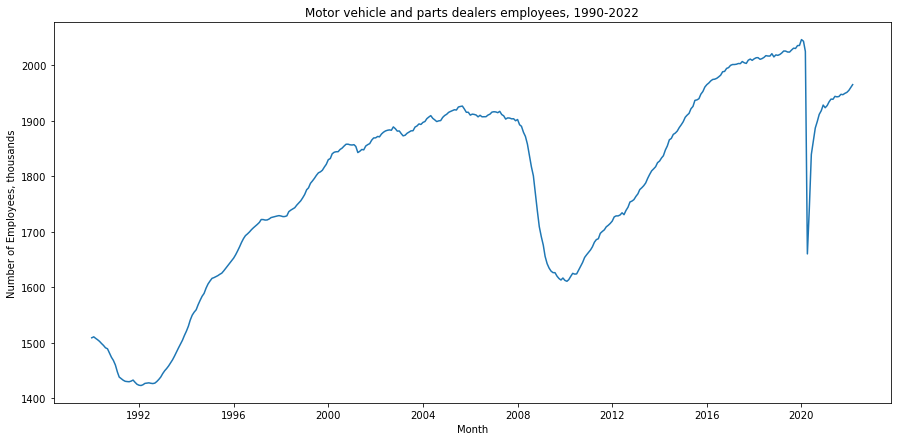

In [21]:
# adjust figure size
plt.figure(figsize = (15,7))

# plot the distribution
fig2 = sns.lineplot(data=motor_parts, x='Time', y='Value')
fig2.set_xlabel('Month')
fig2.set_ylabel('Number of Employees, thousands')
fig2.set_title('Motor vehicle and parts dealers employees, 1990-2022')

## Data visualization for employee of motor vehicles and parts manufacturing

In [22]:
motor_part_Man.describe()

,Value
count,387.000000
mean,1025.573127
std,179.801487
min,623.300000
25%,922.800000
50%,1030.400000
75%,1150.800000
max,1333.600000


Plotting the distribution of employee of motor vehicles and parts manufacturing

Text(0.5, 1.0, 'Motor vehicles and parts manufacturing employees, 1990-2022')

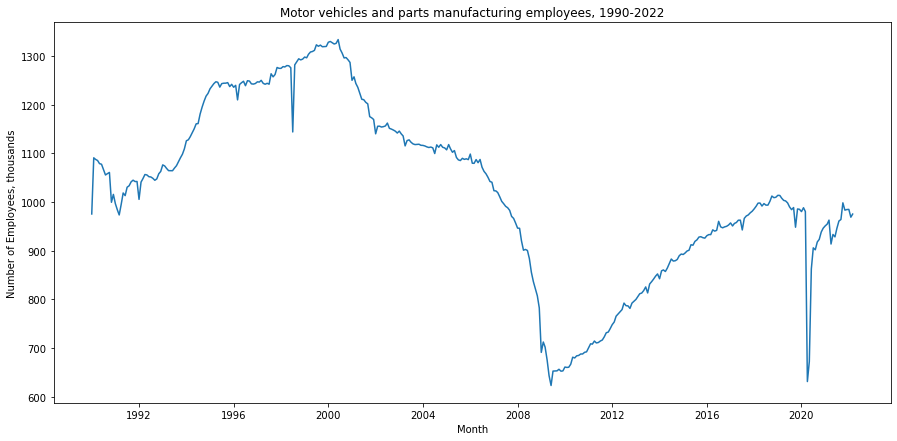

In [23]:
# adjust figure size
plt.figure(figsize = (15,7))

# plot the distribution
fig3 = sns.lineplot(data=motor_part_Man, x='Time', y='Value')
fig3.set_xlabel('Month')
fig3.set_ylabel('Number of Employees, thousands')
fig3.set_title('Motor vehicles and parts manufacturing employees, 1990-2022')

Now we want to combine the three figures above so that we can better analyze their relationship:

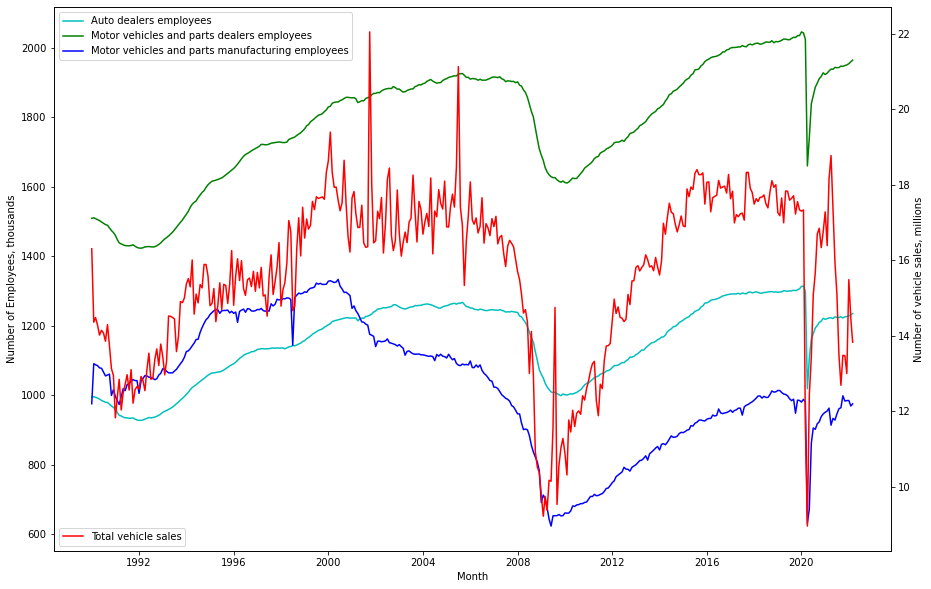

In [24]:
# initialize the figure size
fig, ax1 = plt.subplots(figsize=(15, 10))

# plot the datasets of employees
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Employees, thousands')
ax1.plot('Time','Value',data=auto_dealer, color='c', label="Auto dealers employees")
ax1.legend(loc='upper left')
ax1.plot('Time','Value',data=motor_parts, color='g', label="Motor vehicles and parts dealers employees")
ax1.legend(loc='upper left')
ax1.plot('Time','Value',data=motor_part_Man, color='b', label="Motor vehicles and parts manufacturing employees")
ax1.legend(loc='upper left')

# set the right y-axis to the number of vehicle sales
ax2 = ax1.twinx()
ax2.set_ylabel('Number of vehicle sales, millions')

# plot the dataset of total vehicle sales
ax2.plot('Time','Value',data=totalSA, color='r', label="Total vehicle sales")
ax2.legend(loc='lower left')

From this figure, we can see that the overall trend of the three employees dataset is similar to the total vehicle sales. To further analyze and make our results more accurate, we will break this figure into parts by the increasing trend range we found above. To do this, we need to extract values from dataset and re-plot the figure.

**bold text**## Extract data from dataset: 1991-01-01 to 2001-10-01

In [25]:
# Extra data from 1991-01-01 to 2001-10-01
from IPython.display import display

# set start and end date for df.query() to use
start_date = '1991-01-01'
end_date = '2001-10-01'

auto_dealer_1 = auto_dealer.query('Time >= @start_date and Time <= @end_date')
auto_dealer_1.columns.name = 'auto_dealer_1'

motor_parts_1 = motor_parts.query('Time >= @start_date and Time <= @end_date')
motor_parts_1.columns.name = 'motor_parts_1'

motor_part_Man_1 = motor_part_Man.query('Time >= @start_date and Time <= @end_date')
motor_part_Man_1.columns.name = 'motor_part_Man_1'

totalSA_1 = totalSA.query('Time >= @start_date and Time <= @end_date')
totalSA_1.columns.name = 'totalSA_1'

# put three dataframe into a list to display
df_list = [auto_dealer_1, motor_parts_1, motor_part_Man_1, totalSA_1]



## Extract data from dataset: 2009-09-01 to 2017-09-01

In [26]:
# Extra data from 2009-09-01 to 2017-09-01
from IPython.display import display

# set start and end date for df.query() to use
start_date = '2009-09-01'
end_date = '2017-09-01'

auto_dealer_2 = auto_dealer.query('Time >= @start_date and Time <= @end_date')
auto_dealer_2.columns.name = 'auto_dealer_2'

motor_parts_2 = motor_parts.query('Time >= @start_date and Time <= @end_date')
motor_parts_2.columns.name = 'motor_parts_2'

motor_part_Man_2 = motor_part_Man.query('Time >= @start_date and Time <= @end_date')
motor_part_Man_2.columns.name = 'motor_part_Man_2'

totalSA_2 = totalSA.query('Time >= @start_date and Time <= @end_date')
totalSA_2.columns.name = 'totalSA_2'

# put three dataframe into a list to display
df_list = [auto_dealer_2, motor_parts_2, motor_part_Man_2, totalSA_2]

# reset each data frame's index and combine them into one data frame
for df in df_list:
    df.reset_index(drop=True, inplace=True)

# combine three data frame into one
df_combine_2 = pd.DataFrame(columns=['Time','auto_dealer_2 value', 'motor_parts_2 value', 'motor_part_Man_2 value', 'totalSA_2 value'])
df_combine_2['Time'] = auto_dealer_2['Time']
df_combine_2['auto_dealer_2 value'] = auto_dealer_2['Value']
df_combine_2['motor_parts_2 value'] = motor_parts_2['Value']
df_combine_2['motor_part_Man_2 value'] = motor_part_Man_2 ['Value']
df_combine_2['totalSA_2 value'] = totalSA_2 ['Value']

df_combine_2

,Time,auto_dealer_2 value,motor_parts_2 value,motor_part_Man_2 value,totalSA_2 value
0,2009-09-01,1004.4,1620.1,653.4,9.535
1,2009-10-01,1001.4,1615.9,656.6,10.576
2,2009-11-01,998.8,1613.2,652.7,11.041
3,2009-12-01,1003.7,1616.8,653.3,11.284
4,2010-01-01,1001.5,1612.5,661.2,10.893
...,...,...,...,...,...
92,2017-05-01,1293.5,2002.9,962.7,17.158
93,2017-06-01,1291.1,2002.7,962.8,17.236
94,2017-07-01,1294.4,2006.5,942.7,17.253
95,2017-08-01,1292.5,2004.2,966.5,17.067


## Extract data from dataset: 2020-04-01 to 2021-04-01

In [27]:
# Extra data from 2020-04-01 to 2021-04-01
from IPython.display import display

# set start and end date for df.query() to use
start_date = '2020-04-01'
end_date = '2021-04-01'

auto_dealer_3 = auto_dealer.query('Time >= @start_date and Time <= @end_date')
auto_dealer_3.columns.name = 'auto_dealer_3'

motor_parts_3 = motor_parts.query('Time >= @start_date and Time <= @end_date')
motor_parts_3.columns.name = 'motor_parts_3'

motor_part_Man_3 = motor_part_Man.query('Time >= @start_date and Time <= @end_date')
motor_part_Man_3.columns.name = 'motor_part_Man_3'

totalSA_3 = totalSA.query('Time >= @start_date and Time <= @end_date')
totalSA_3.columns.name = 'totalSA_3'

# put three dataframe into a list to display
df_list = [auto_dealer_3, motor_parts_3, motor_part_Man_3, totalSA_3]

for df in df_list:
    display(df)

auto_dealer_3,Time,Value
579,2020-04-01,1018.8
580,2020-05-01,1106.6
581,2020-06-01,1162.1
582,2020-07-01,1177.1
583,2020-08-01,1193.7
584,2020-09-01,1200.8
585,2020-10-01,1209.7
586,2020-11-01,1213.5
587,2020-12-01,1221.4
588,2021-01-01,1218.6


motor_parts_3,Time,Value
363,2020-04-01,1660.2
364,2020-05-01,1741.8
365,2020-06-01,1839.2
366,2020-07-01,1862.8
367,2020-08-01,1886.8
368,2020-09-01,1898.6
369,2020-10-01,1911.4
370,2020-11-01,1917.9
371,2020-12-01,1928.1
372,2021-01-01,1923.3


motor_part_Man_3,Time,Value
363,2020-04-01,631.4
364,2020-05-01,672.7
365,2020-06-01,862.6
366,2020-07-01,905.9
367,2020-08-01,901.9
368,2020-09-01,918.0
369,2020-10-01,923.3
370,2020-11-01,938.4
371,2020-12-01,946.3
372,2021-01-01,951.0


totalSA_3,Time,Value
531,2020-04-01,8.961
532,2020-05-01,12.438
533,2020-06-01,13.447
534,2020-07-01,15.089
535,2020-08-01,15.677
536,2020-09-01,16.703
537,2020-10-01,16.852
538,2020-11-01,16.339
539,2020-12-01,16.761
540,2021-01-01,17.287


Now we plot the three dataset again:

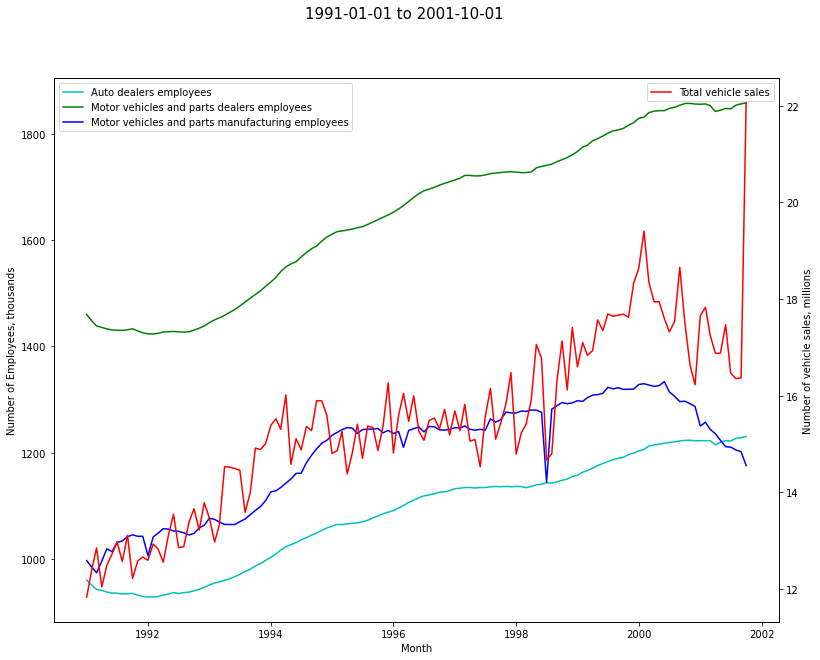

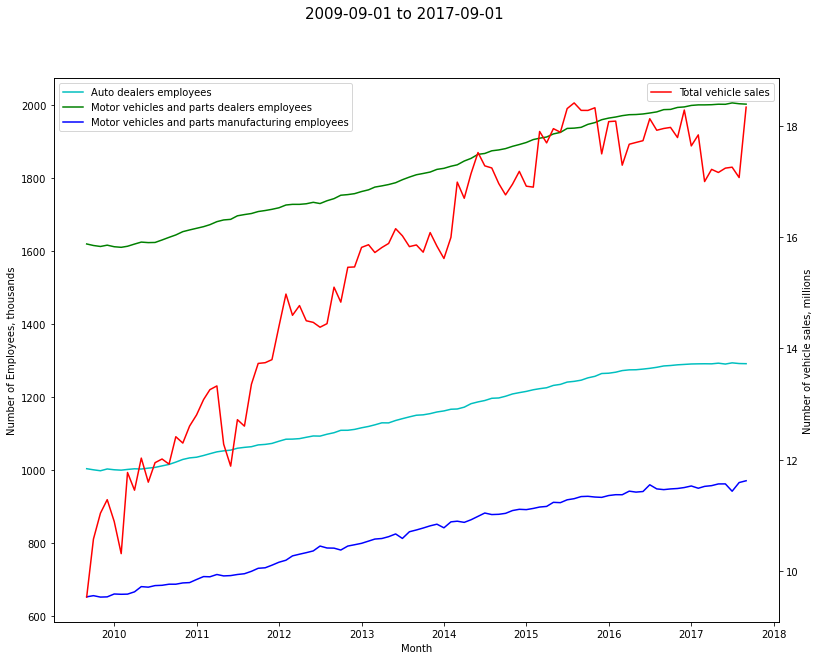

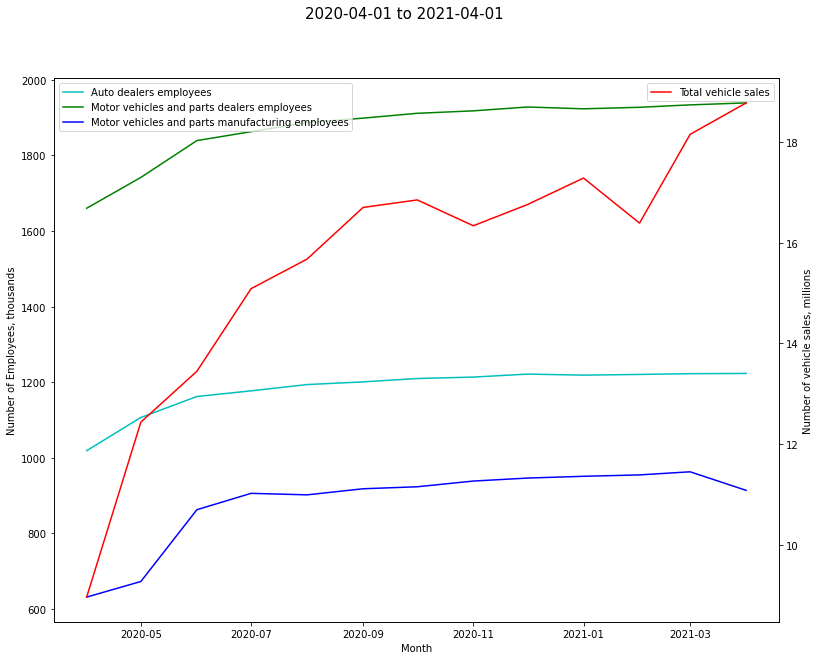

In [28]:
"""
Plotting data from 1991-01-01 to 2001-10-01
"""
fig1, ax1 = plt.subplots(figsize=(13, 10))
fig1.suptitle('1991-01-01 to 2001-10-01', fontsize=15)
# plot the datasets of employees
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Employees, thousands')
ax1.plot('Time','Value',data=auto_dealer_1, color='c', label="Auto dealers employees")
ax1.legend(loc='upper left')
ax1.plot('Time','Value',data=motor_parts_1, color='g', label="Motor vehicles and parts dealers employees")
ax1.legend(loc='upper left')
ax1.plot('Time','Value',data=motor_part_Man_1, color='b', label="Motor vehicles and parts manufacturing employees")
ax1.legend(loc='upper left')
# set the right y-axis to the number of vehicle sales
ax2 = ax1.twinx()
ax2.set_ylabel('Number of vehicle sales, millions')
# plot the dataset of total vehicle sales
ax2.plot('Time','Value',data=totalSA_1, color='r', label="Total vehicle sales")
ax2.legend(loc='upper right')

"""
Plotting data from 2009-09-01 to 2017-09-01
"""
# initialize the figure size
fig, ax1 = plt.subplots(figsize=(13, 10))
fig.suptitle('2009-09-01 to 2017-09-01', fontsize=15)
# plot the datasets of employees
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Employees, thousands')
ax1.plot('Time','Value',data=auto_dealer_2, color='c', label="Auto dealers employees")
ax1.legend(loc='upper left')
ax1.plot('Time','Value',data=motor_parts_2, color='g', label="Motor vehicles and parts dealers employees")
ax1.legend(loc='upper left')
ax1.plot('Time','Value',data=motor_part_Man_2, color='b', label="Motor vehicles and parts manufacturing employees")
ax1.legend(loc='upper left')
# set the right y-axis to the number of vehicle sales
ax2 = ax1.twinx()
ax2.set_ylabel('Number of vehicle sales, millions')
# plot the dataset of total vehicle sales
ax2.plot('Time','Value',data=totalSA_2, color='r', label="Total vehicle sales")
ax2.legend(loc='upper right')


"""
Plotting data from 2020-04-01 to 2021-04-01
"""
# initialize the figure size
fig, ax1 = plt.subplots(figsize=(13, 10))
fig.suptitle('2020-04-01 to 2021-04-01', fontsize=15)
# plot the datasets of employees
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Employees, thousands')
ax1.plot('Time','Value',data=auto_dealer_3, color='c', label="Auto dealers employees")
ax1.legend(loc='upper left')
ax1.plot('Time','Value',data=motor_parts_3, color='g', label="Motor vehicles and parts dealers employees")
ax1.legend(loc='upper left')
ax1.plot('Time','Value',data=motor_part_Man_3, color='b', label="Motor vehicles and parts manufacturing employees")
ax1.legend(loc='upper left')
# set the right y-axis to the number of vehicle sales
ax2 = ax1.twinx()
ax2.set_ylabel('Number of vehicle sales, millions')
# plot the dataset of total vehicle sales
ax2.plot('Time','Value',data=totalSA_3, color='r', label="Total vehicle sales")
ax2.legend(loc='upper right')

In the first and second figures, automotive manufacturing and retail trade employment increases as the number of vehicle sales rises. However, in the last figure, while car sales continue to increase substantially, the number of employees in the automotive-related industry has not grown substantially.

OUTLIERS:
   There were no large outliers but we did find 3 points in sales that were significant higher than the rest. They did not lead to noticeable change in employments, however. We have also noticed that sales tend to fluctuate much more frequentently than employments which makes sense because people seek stabilities in their jobs. We suspect sales are impacted by many small and random factors that might not be measureable. 

Additionally we can also 

In [29]:
# reset each data frame's index and combine them into one data frame
for df in df_list:
    df.reset_index(drop=True, inplace=True)

# combine three data frame into one
df_combine_2 = pd.DataFrame(columns=['Time','auto_dealer', 'motor_parts', 'motor_part_Man', 'totalSA'])
df_combine_2['Time'] = auto_dealer_3['Time']
df_combine_2['auto_dealer'] = auto_dealer_3['Value']
df_combine_2['motor_parts'] = motor_parts_3['Value']
df_combine_2['motor_part_Man'] = motor_part_Man_3 ['Value']
df_combine_2['totalSA'] = totalSA_3 ['Value']

print(df_combine_2.head())

outcome, predictors = patsy.dmatrices('   auto_dealer ~ totalSA ', df_combine_2)
model = sm.OLS(outcome, predictors)
res_1=model.fit()
print(res_1.summary())

outcome_2, predictors_2 = patsy.dmatrices('  motor_parts  ~ totalSA', df_combine_2)
model = sm.OLS(outcome_2, predictors_2)
res_2=model.fit()
print(res_2.summary())


outcome_3, predictors_3 = patsy.dmatrices(' motor_part_Man  ~ totalSA', df_combine_2)
model = sm.OLS(outcome_3, predictors_3)
res_3=model.fit()
print(res_3.summary())


        Time  auto_dealer  motor_parts  motor_part_Man  totalSA
0 2020-04-01       1018.8       1660.2           631.4    8.961
1 2020-05-01       1106.6       1741.8           672.7   12.438
2 2020-06-01       1162.1       1839.2           862.6   13.447
3 2020-07-01       1177.1       1862.8           905.9   15.089
4 2020-08-01       1193.7       1886.8           901.9   15.677
                            OLS Regression Results                            
Dep. Variable:            auto_dealer   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.48e-07
Time:                        19:50:51   Log-Likelihood:                -54.156
No. Observations:                  13   AIC:                             112.3
Df Residuals:                      11   BIC:                   

C:\Users\asd\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\asd\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\asd\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


As we can see from the summary, the coefficient for all 3 outcomes are all very high. This shows vehicle sales are a good predictor for these 3 types of jobs in the auto industry. 

# Ethics & Privacy

All the datasets we use are freely published to the public by the U.S. Bureau of Labor Statistics. Besides, since our dataset is statistics of the employment situation of industries, they do not contain any sensitive or personal information that would cause potential ethical and privacy issues. What's more, the datasets we use are collected from statistics rather than a questionnaire that can be answered by bias, and we believe that these data are neutral.

# Conclusion & Discussion

After performing the data virtualize and analysis, we can clearly see from the figures above that the number of employees in the automotive-related industry grows as the increment of total vehicle sales in the United States. Hence, we conclude that the automotive market does boost U.S. automotive manufacturing and retail trade employment.

Although in the third figure above, car sales continue to increase substantially and the number of employees in the automotive-related industry has not grown substantially, the number of employees is still uptrend. Auto sales have driven job growth, but the impact of the pandemic has not entirely dissipated. For example, the shortage of chips caused by the epidemic led many auto companies to choose to reduce production, which indirectly led to slow employment growth. We believe that if auto sales continue to trend upward, employment in auto-related industries will continue to rise as the impact of covid-19 declines.

# Team Contributions

- Weijie Huang
    - Data cleaning
    - Data Analysis
    - Background Research
    - Ethics & Privacy
    - Data visualization


- Jianzhang Chen
    - Project proposal
    - Background Research
    - Conclusion
    - Data Analysis


- Audrey Yeh
    - Background Research
    - Data Analysis
    - video presentation
    - Edit text for clarity


- Liu He
    - Project proposal
    - Data Analysis
    - Background Research
    - Edit text for clarity
    - Data Analysis